In [2]:
import numpy as np
import matplotlib.pyplot as plt

0.2824147815994682 -0.24751279528711337


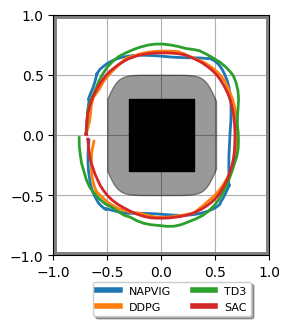

In [30]:
napvig = np.loadtxt('napvig/front35.csv', delimiter=',')[:2040, :][::20]
ddpg1 = np.loadtxt('ddpg/ddpg_1.csv', delimiter=',')[:2000, :][::20]
# ddpg2 = np.loadtxt('ddpg/ddpg_2.csv', delimiter=',')[::20]
td3 = np.loadtxt('td3/td3_2.csv', delimiter=',')[:2050, :][::20]
sac = np.loadtxt('sac/sac_3.csv', delimiter=',')[:2070, :][::20]

offset_x = np.mean(napvig[:,0], axis=0) + 0.1
offset_y = np.mean(napvig[:,1], axis=0)
print(offset_x, offset_y)

fig, ax = plt.subplots(figsize=(3, 3))
ax.set_axisbelow(True)
plt.grid()
# plt.scatter(napvig[:,0]-offset_x, napvig[:,1]-offset_y, s=10)
plt.plot(napvig[:,0]-offset_x, napvig[:,1]-offset_y, linewidth=2)
plt.plot(ddpg1[:,0]-offset_x, ddpg1[:,1]-offset_y, linewidth=2)
# plt.plot(ddpg2[:,0]-offset_x, ddpg2[:,1]-offset_y, linewidth=1)
plt.plot(td3[:,0]-offset_x, td3[:,1]-offset_y, linewidth=2)
plt.plot(sac[:,0]-offset_x, sac[:,1]-offset_y, linewidth=2)

x = np.arange(-0.3, 0.31, 0.05)
y = np.array([0.3] * len(x))
plt.fill_between(x, -y, y, color='k', alpha=1)
x = np.arange(-0.5, 0.51, 0.001)
sharpness = 10  # higher = sharper edges
y_top = 0.3 + 0.2 * np.tanh(sharpness * (x + 0.5)) * np.tanh(sharpness * (0.5 - x))
y_bottom = -y_top

# Fill the region between top and bottom
plt.fill_between(x, y_bottom, y_top, color='k', alpha=0.4)

plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], color='gray', linewidth=5)
plt.ylim([-1., 1.])
plt.xlim([-1., 1.])

plt.yticks([-1, -0.5, 0, 0.5, 1])
# plt.xlabel('x')
# plt.ylabel('y')

plt.tight_layout()

labels = ['NAPVIG', 'DDPG', 'TD3', 'SAC']
leg=fig.legend(labels, loc='upper center', bbox_to_anchor=(.59, 0.06), fancybox=True, shadow=True, ncol=2, prop={'size': 8})
# set the linewidth of each legend object
for legobj in leg.legend_handles:
    legobj.set_linewidth(4.0)



plt.savefig('arena_trajectories.pdf', bbox_inches="tight")